In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [406]:
columnas = [
    'checking_account',
    'duration',
    'credit_history',
    'purpose',
    'credit_amount',
    'savings_account',
    'employment',
    'installment_rate',
    'personal_status',
    'other_debtors',
    'residence_since',
    'property',
    'age',
    'other_installment',
    'housing',
    'existing_credits',
    'job',
    'people_liable',
    'telephone',
    'foreign_worker',
    'target'
]

In [407]:
df = pd.read_csv('statlog+german+credit+data/german.data', 
                 sep=' ', 
                 names=columnas,
                 header=None)

In [408]:
checking_account_map = {
    'A11': '< 0 DM',
    'A12': '0 <= ... < 200 DM',
    'A13': '>= 200 DM / salary assignments',
    'A14': 'no checking account'
}

credit_history_map = {
    'A30': 'no credits taken/all paid back duly',
    'A31': 'all credits at this bank paid back duly',
    'A32': 'existing credits paid back duly till now',
    'A33': 'delay in paying off in the past',
    'A34': 'critical account/other credits existing'
}

purpose_map = {
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/television',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A47': 'vacation',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others'
}

savings_account_map = {
    'A61': '< 100 DM',
    'A62': '100 <= ... < 500 DM',
    'A63': '500 <= ... < 1000 DM',
    'A64': '>= 1000 DM',
    'A65': 'unknown/no savings account'
}

employment_map = {
    'A71': 'unemployed',
    'A72': '< 1 year',
    'A73': '1 <= ... < 4 years',
    'A74': '4 <= ... < 7 years',
    'A75': '>= 7 years'
}

personal_status_map = {
    'A91': 'male: divorced/separated',
    'A92': 'female: divorced/separated/married',
    'A93': 'male: single',
    'A94': 'male: married/widowed',
    'A95': 'female: single'
}

other_debtors_map = {
    'A101': 'none',
    'A102': 'co-applicant',
    'A103': 'guarantor'
}

property_map = {
    'A121': 'real estate',
    'A122': 'building society savings agreement/life insurance',
    'A123': 'car or other',
    'A124': 'unknown/no property'
}

other_installment_map = {
    'A141': 'bank',
    'A142': 'stores',
    'A143': 'none'
}

housing_map = {
    'A151': 'rent',
    'A152': 'own',
    'A153': 'for free'
}

job_map = {
    'A171': 'unemployed/unskilled - non-resident',
    'A172': 'unskilled - resident',
    'A173': 'skilled employee/official',
    'A174': 'management/self-employed/highly qualified'
}

telephone_map = {
    'A191': 'none',
    'A192': 'yes, registered under customer name'
}

foreign_worker_map = {
    'A201': 'yes',
    'A202': 'no'
}

df['checking_account'] = df['checking_account'].map(checking_account_map)
df['credit_history'] = df['credit_history'].map(credit_history_map)
df['purpose'] = df['purpose'].map(purpose_map)
df['savings_account'] = df['savings_account'].map(savings_account_map)
df['employment'] = df['employment'].map(employment_map)
df['personal_status'] = df['personal_status'].map(personal_status_map)
df['other_debtors'] = df['other_debtors'].map(other_debtors_map)
df['property'] = df['property'].map(property_map)
df['other_installment'] = df['other_installment'].map(other_installment_map)
df['housing'] = df['housing'].map(housing_map)
df['job'] = df['job'].map(job_map)
df['telephone'] = df['telephone'].map(telephone_map)
df['foreign_worker'] = df['foreign_worker'].map(foreign_worker_map)

df['target'] = df['target'].map({1: 'Good', 2: 'Bad'})

In [409]:
X = df.drop('target', axis=1)
y = df['target']

In [410]:
print("\nInformación del Dataset:")
print(f"Número de muestras: {len(df)}")
print(f"Número de características: {len(X.columns)}")
print("\nTipos de características:")
print(X.dtypes)
print("\nDistribución del objetivo:")
print(y.value_counts())


Información del Dataset:
Número de muestras: 1000
Número de características: 20

Tipos de características:
checking_account     object
duration              int64
credit_history       object
purpose              object
credit_amount         int64
savings_account      object
employment           object
installment_rate      int64
personal_status      object
other_debtors        object
residence_since       int64
property             object
age                   int64
other_installment    object
housing              object
existing_credits      int64
job                  object
people_liable         int64
telephone            object
foreign_worker       object
dtype: object

Distribución del objetivo:
target
Good    700
Bad     300
Name: count, dtype: int64


In [411]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Cantidad')

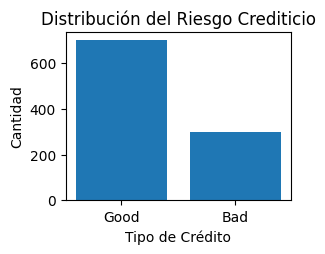

In [412]:
# 1. Distribución del Objetivo
plt.subplot(2, 2, 1)
target_counts = y.value_counts()
plt.bar(target_counts.index, target_counts.values)
plt.title('Distribución del Riesgo Crediticio')
plt.xlabel('Tipo de Crédito')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

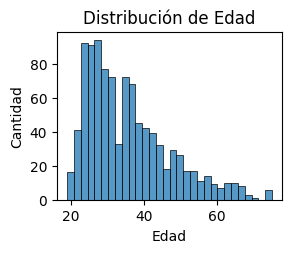

In [413]:
# 2. Distribución de Edad
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='age', bins=30)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Text(0.5, 1.0, 'Distribución por Género')

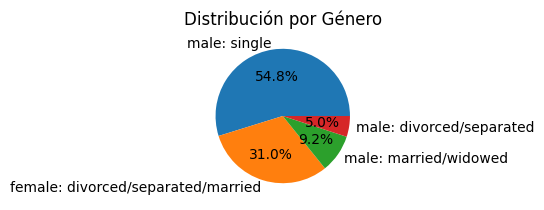

In [414]:
# 3. Distribución por Género (de personal_status)
plt.subplot(2, 2, 3)
gender_counts = df['personal_status'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribución por Género')

Text(0.5, 1.0, 'Personas Responsables')

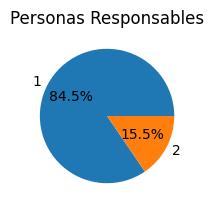

In [415]:
plt.subplot(2, 2, 3)
gender_counts = df['people_liable'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Personas Responsables')

Text(0, 0.5, 'Monto del Crédito')

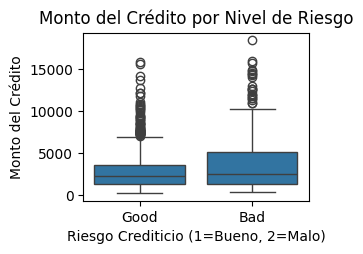

In [416]:
# 4. Distribución del Monto del Crédito
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='target', y='credit_amount')
plt.title('Monto del Crédito por Nivel de Riesgo')
plt.xlabel('Riesgo Crediticio (1=Bueno, 2=Malo)')
plt.ylabel('Monto del Crédito')

In [417]:
print("\nEstadísticas Detalladas:")
print("\nEstadísticas de Edad:")
print(df['age'].describe())

print("\nEstadísticas de Monto del Crédito:")
print(df['credit_amount'].describe())

print("\nDistribución del Objetivo:")
print(y.value_counts(normalize=True).round(3))


Estadísticas Detalladas:

Estadísticas de Edad:
count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

Estadísticas de Monto del Crédito:
count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64

Distribución del Objetivo:
target
Good    0.7
Bad     0.3
Name: proportion, dtype: float64


In [418]:
# Analisis de variables categoricas
categorical_cols = ['checking_account', 'credit_history', 'purpose', 'savings_account', 
                   'employment', 'personal_status', 'other_debtors', 'property',
                   'other_installment', 'housing', 'job', 'telephone', 'foreign_worker']

print("\nDistribución de variables categoricas:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head())


Distribución de variables categoricas:

checking_account:
checking_account
no checking account               394
< 0 DM                            274
0 <= ... < 200 DM                 269
>= 200 DM / salary assignments     63
Name: count, dtype: int64

credit_history:
credit_history
existing credits paid back duly till now    530
critical account/other credits existing     293
delay in paying off in the past              88
all credits at this bank paid back duly      49
no credits taken/all paid back duly          40
Name: count, dtype: int64

purpose:
purpose
radio/television       280
car (new)              234
furniture/equipment    181
car (used)             103
business                97
Name: count, dtype: int64

savings_account:
savings_account
< 100 DM                      603
unknown/no savings account    183
100 <= ... < 500 DM           103
500 <= ... < 1000 DM           63
>= 1000 DM                     48
Name: count, dtype: int64

employment:
employment
1 <= ... < 4 ye

Text(0.5, 1.0, 'Matriz de Correlación de Variables Numéricas')

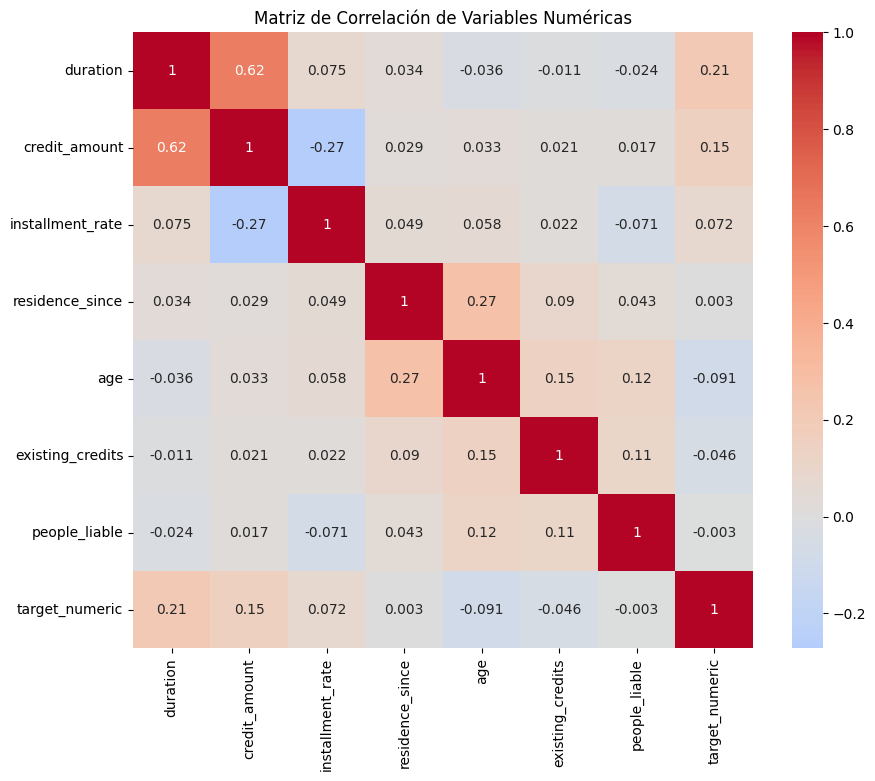

In [419]:
numerical_cols = ['duration', 'credit_amount', 'installment_rate', 'residence_since', 
                 'age', 'existing_credits', 'people_liable']

plt.figure(figsize=(10, 8))
# Convertir target a numerico (Good=1, Bad=2) para correlacion
df_corr = df.copy()
df_corr['target_numeric'] = (df_corr['target'] == 'Bad').astype(int) + 1

correlation_matrix = df_corr[numerical_cols + ['target_numeric']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Variables Numéricas')

In [420]:
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

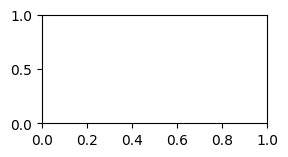

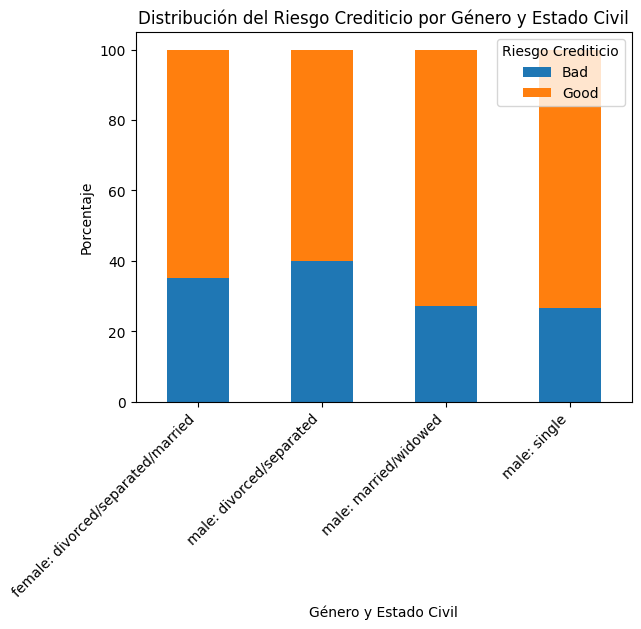

In [421]:
# 1. Análisis de Sesgo por Género
plt.subplot(3, 2, 1)
gender_target = pd.crosstab(df['personal_status'], df['target'], normalize='index') * 100
gender_target.plot(kind='bar', stacked=True)
plt.title('Distribución del Riesgo Crediticio por Género y Estado Civil')
plt.xlabel('Género y Estado Civil')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Riesgo Crediticio')

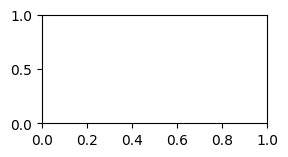

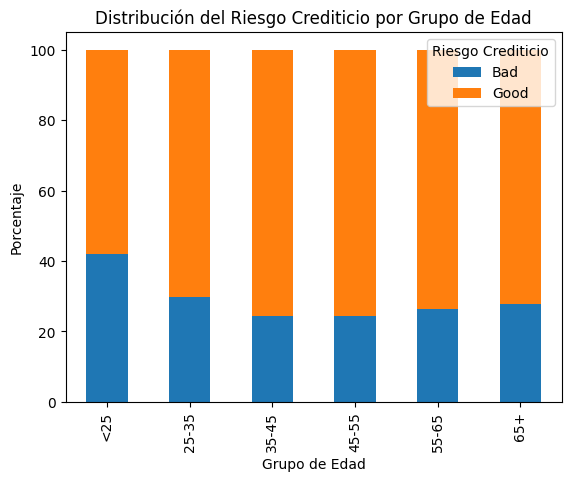

In [422]:
# 2. Análisis de Sesgo por Edad
plt.subplot(3, 2, 2)
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 65, 100], 
                         labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])
age_target = pd.crosstab(df['age_group'], df['target'], normalize='index') * 100
age_target.plot(kind='bar', stacked=True)
plt.title('Distribución del Riesgo Crediticio por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Porcentaje')
plt.legend(title='Riesgo Crediticio')

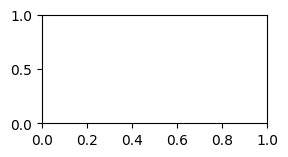

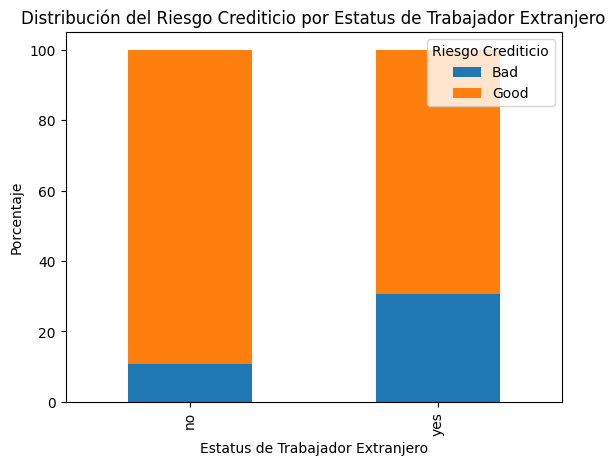

In [423]:
# 3. Sesgo por Trabajador Extranjero
plt.subplot(3, 2, 3)
foreign_target = pd.crosstab(df['foreign_worker'], df['target'], normalize='index') * 100
foreign_target.plot(kind='bar', stacked=True)
plt.title('Distribución del Riesgo Crediticio por Estatus de Trabajador Extranjero')
plt.xlabel('Estatus de Trabajador Extranjero')
plt.ylabel('Porcentaje')
plt.legend(title='Riesgo Crediticio')

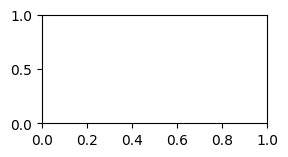

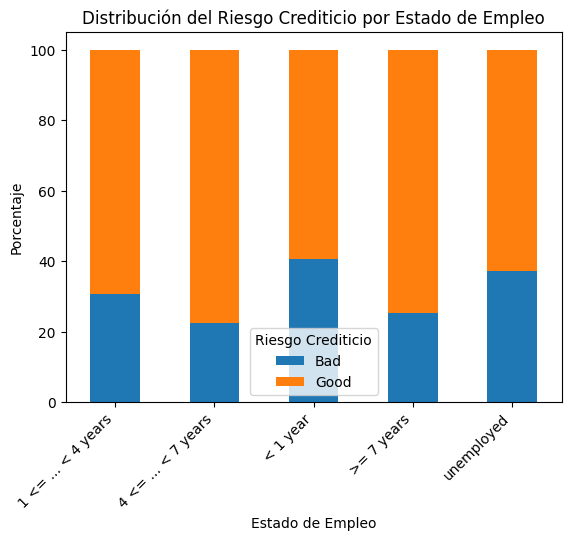

In [424]:
# 4. Sesgo por Estado de Empleo
plt.subplot(3, 2, 4)
employment_target = pd.crosstab(df['employment'], df['target'], normalize='index') * 100
employment_target.plot(kind='bar', stacked=True)
plt.title('Distribución del Riesgo Crediticio por Estado de Empleo')
plt.xlabel('Estado de Empleo')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Riesgo Crediticio')

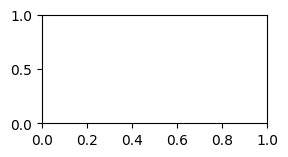

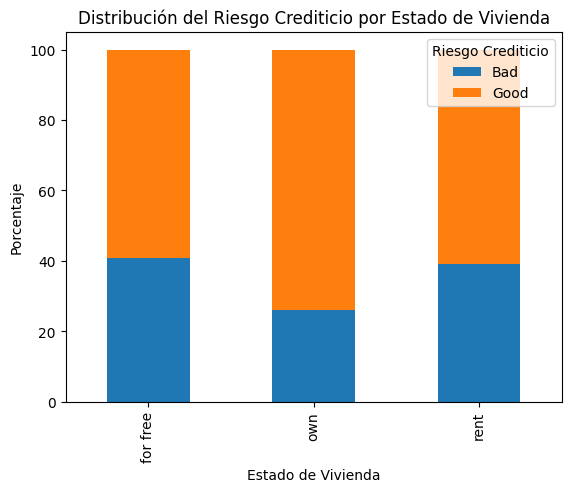

In [425]:
# 5. Sesgo por Estado de Vivienda
plt.subplot(3, 2, 5)
housing_target = pd.crosstab(df['housing'], df['target'], normalize='index') * 100
housing_target.plot(kind='bar', stacked=True)
plt.title('Distribución del Riesgo Crediticio por Estado de Vivienda')
plt.xlabel('Estado de Vivienda')
plt.ylabel('Porcentaje')
plt.legend(title='Riesgo Crediticio')

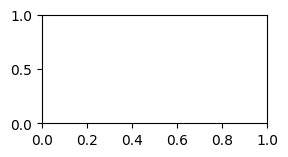

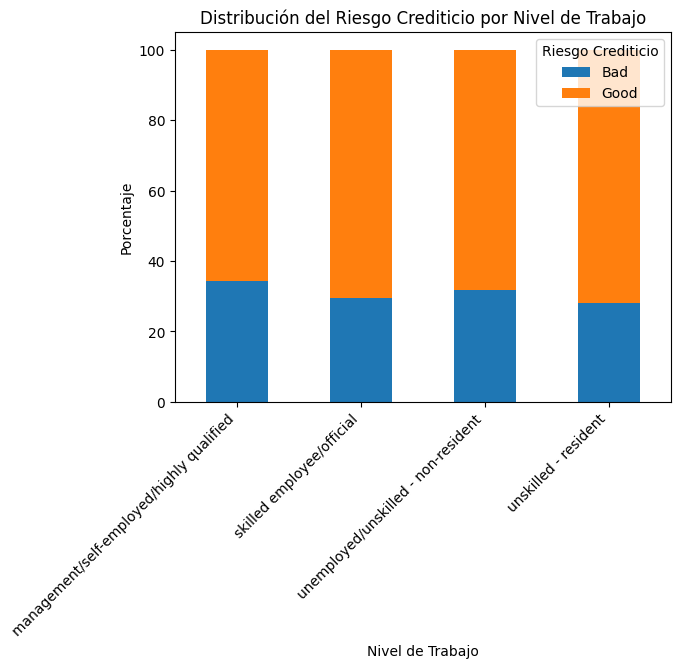

In [426]:
# 6. Sesgo por Nivel de Trabajo
plt.subplot(3, 2, 6)
job_target = pd.crosstab(df['job'], df['target'], normalize='index') * 100
job_target.plot(kind='bar', stacked=True)
plt.title('Distribución del Riesgo Crediticio por Nivel de Trabajo')
plt.xlabel('Nivel de Trabajo')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Riesgo Crediticio')

In [427]:
# Preparar datos para modelado

numerical_cols = ['duration', 'credit_amount', 'installment_rate', 'residence_since', 
                 'age', 'existing_credits', 'people_liable']
categorical_cols = ['checking_account', 'credit_history', 'purpose', 'savings_account', 
                   'employment', 'personal_status', 'other_debtors', 'property',
                   'other_installment', 'housing', 'job', 'telephone', 'foreign_worker']

In [428]:
# Crear pipelines de preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [429]:
# Combinar pasos de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Separar datos
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [430]:
# Crear y entrenar modelos
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

In [431]:
# Diccionario para guardar resultados
results = {}

In [432]:
# Entrenar y evaluar cada modelo
for name, model in models.items():
    print(f"\nEntrenando {name}...")
    
    # Crear pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Entrenar modelo
    pipeline.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = pipeline.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Good')
    recall = recall_score(y_test, y_pred, pos_label='Good')
    f1 = f1_score(y_test, y_pred, pos_label='Good')
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_pred,
        'pipeline': pipeline
    }
    
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))


Entrenando Random Forest...
Accuracy: 0.790
Precision: 0.804
Recall: 0.929
F1 Score: 0.862

Reporte de clasificación:
              precision    recall  f1-score   support

         Bad       0.73      0.46      0.56        59
        Good       0.80      0.93      0.86       141

    accuracy                           0.79       200
   macro avg       0.77      0.69      0.71       200
weighted avg       0.78      0.79      0.77       200


Entrenando Logistic Regression...
Accuracy: 0.795
Precision: 0.829
Recall: 0.894
F1 Score: 0.860

Reporte de clasificación:
              precision    recall  f1-score   support

         Bad       0.69      0.56      0.62        59
        Good       0.83      0.89      0.86       141

    accuracy                           0.80       200
   macro avg       0.76      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200



In [433]:
print("Comparación de modelos:")
comparison_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'Precision': [results[model]['precision'] for model in results],
    'Recall': [results[model]['recall'] for model in results],
    'F1 Score': [results[model]['f1'] for model in results]
})
print(comparison_df)

Comparación de modelos:
                Modelo  Accuracy  Precision    Recall  F1 Score
0        Random Forest     0.790   0.803681  0.929078  0.861842
1  Logistic Regression     0.795   0.828947  0.893617  0.860068


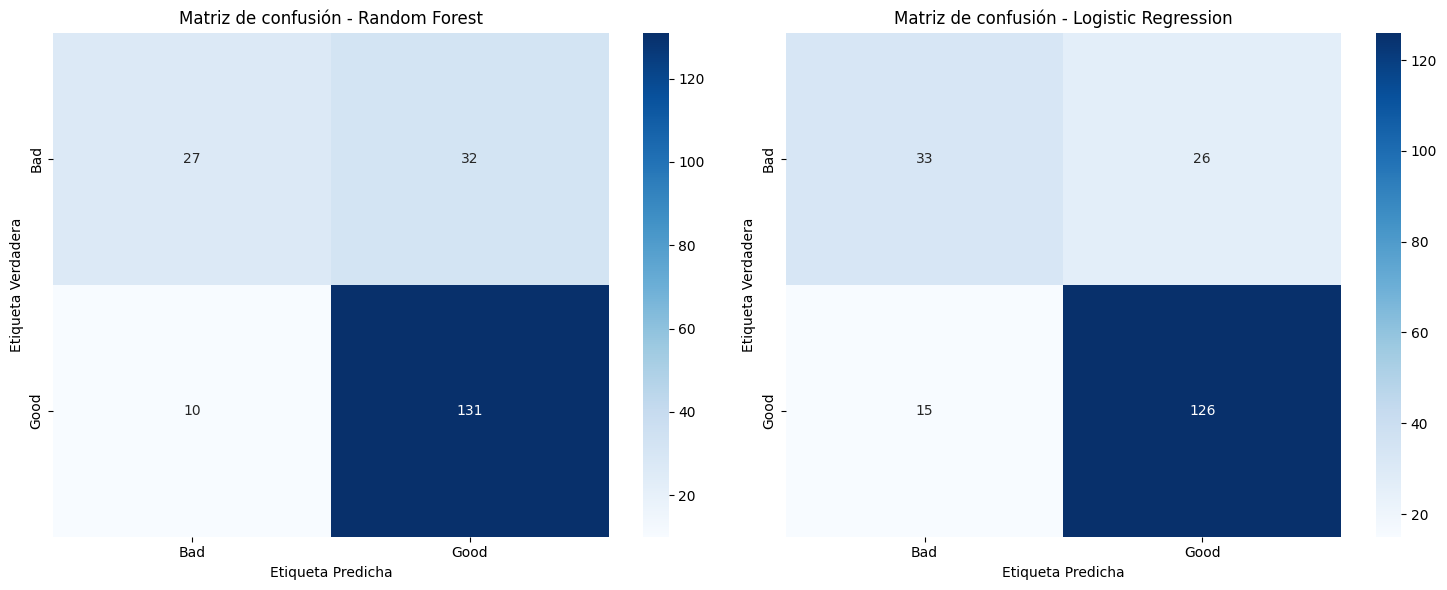

In [434]:
# Matrices de confusión
plt.figure(figsize=(15, 6))

for idx, (name, model_results) in enumerate(results.items(), 1):
    plt.subplot(1, 2, idx)
    cm = confusion_matrix(y_test, model_results['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Bad', 'Good'],
                yticklabels=['Bad', 'Good'])
    plt.title(f'Matriz de confusión - {name}')
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')

plt.tight_layout()
plt.show()



Análisis de Equidad por Género:


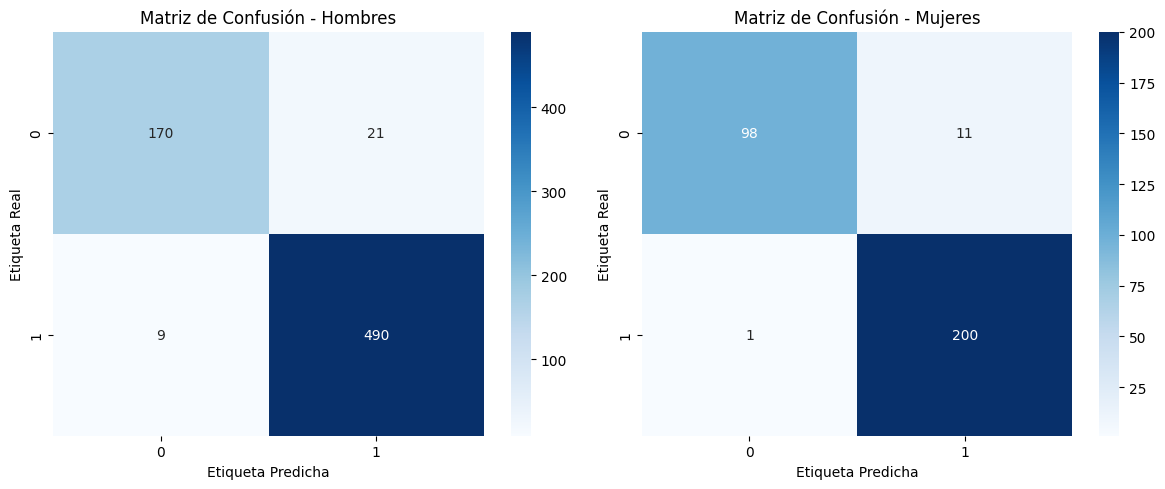


Métricas de Equidad (umbral = 0.01):
Diferencia Statistical Parity: 0.060 INJUSTO
Diferencia Equal Opportunity: 0.013 INJUSTO
Diferencia Equalized Odds: 0.022 INJUSTO
Diferencia Predictive Parity: 0.011 INJUSTO


In [435]:
# Analizar métricas de equidad por género
print("\nAnálisis de Equidad por Género:")

# Obtener predicciones del modelo Random Forest
rf_pipeline = results['Random Forest']['pipeline']
y_pred = rf_pipeline.predict(X)

# Dividir datos por género
X_male = X[df['personal_status'].isin(['male: divorced/separated', 'male: single', 'male: married/widowed'])]
X_female = X[df['personal_status'].isin(['female: divorced/separated/married', 'female: single'])]
y_male = y[df['personal_status'].isin(['male: divorced/separated', 'male: single', 'male: married/widowed'])]
y_female = y[df['personal_status'].isin(['female: divorced/separated/married', 'female: single'])]
y_pred_male = rf_pipeline.predict(X_male)
y_pred_female = rf_pipeline.predict(X_female)

# Graficar matrices de confusión por género
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_male = confusion_matrix(y_male, y_pred_male)
sns.heatmap(cm_male, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Hombres')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')

plt.subplot(1, 2, 2)
cm_female = confusion_matrix(y_female, y_pred_female)
sns.heatmap(cm_female, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Mujeres')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')

plt.tight_layout()
plt.show()

# Calcular métricas de equidad
umbral = 0.01  # Umbral para disparidad de equidad

# Statistical Parity
tasa_pos_pred_hombres = np.mean(y_pred_male == 'Good')
tasa_pos_pred_mujeres = np.mean(y_pred_female == 'Good')
dif_paridad_estadistica = abs(tasa_pos_pred_hombres - tasa_pos_pred_mujeres)

# Equal Opportunity
tpr_hombres = recall_score(y_male, y_pred_male, pos_label='Good')
tpr_mujeres = recall_score(y_female, y_pred_female, pos_label='Good')
dif_igualdad_oportunidades = abs(tpr_hombres - tpr_mujeres)

# Equalized Odds
tn_hombres = confusion_matrix(y_male, y_pred_male)[0][0]
fp_hombres = confusion_matrix(y_male, y_pred_male)[0][1]
fpr_hombres = fp_hombres / (fp_hombres + tn_hombres)

tn_mujeres = confusion_matrix(y_female, y_pred_female)[0][0]
fp_mujeres = confusion_matrix(y_female, y_pred_female)[0][1]
fpr_mujeres = fp_mujeres / (fp_mujeres + tn_mujeres)
dif_odds_equalizados = abs(fpr_hombres - fpr_mujeres) + abs(tpr_hombres - tpr_mujeres)

# Predictive Parity
ppv_hombres = precision_score(y_male, y_pred_male, pos_label='Good')
ppv_mujeres = precision_score(y_female, y_pred_female, pos_label='Good')
dif_paridad_predictiva = abs(ppv_hombres - ppv_mujeres)

print(f"\nMétricas de Equidad (umbral = {umbral}):")
print(f"Diferencia Statistical Parity: {dif_paridad_estadistica:.3f} {'INJUSTO' if dif_paridad_estadistica > umbral else 'JUSTO'}")
print(f"Diferencia Equal Opportunity: {dif_igualdad_oportunidades:.3f} {'INJUSTO' if dif_igualdad_oportunidades > umbral else 'JUSTO'}")
print(f"Diferencia Equalized Odds: {dif_odds_equalizados:.3f} {'INJUSTO' if dif_odds_equalizados > umbral else 'JUSTO'}")
print(f"Diferencia Predictive Parity: {dif_paridad_predictiva:.3f} {'INJUSTO' if dif_paridad_predictiva > umbral else 'JUSTO'}")


In [436]:
from holisticai.bias.metrics import classification_bias_metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from holisticai.pipeline import Pipeline
from sklearn.metrics import accuracy_score


from holisticai.bias.mitigation import PrejudiceRemover
from holisticai.bias.mitigation import Reweighing

In [437]:
# Define preprocessing model
mitigator = Reweighing()
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [438]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])

In [439]:
X = df_encoded.drop(['target', 'age_group'], axis=1)
y = df_encoded['target']

In [440]:
X_train_mit, X_test_mit, y_train_mit, y_test_mit = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create binary gender groups (0 for female, 1 for male)
df['gender_binary'] = df['personal_status'].apply(
    lambda x: 1 if 'male' in x.lower() else 0)


In [441]:
group_a_train = df.loc[X_train_mit.index, 'gender_binary'] == 0  # Female
group_b_train = df.loc[X_train_mit.index, 'gender_binary'] == 1  # Male
group_a_test = df.loc[X_test_mit.index, 'gender_binary'] == 0    # Female
group_b_test = df.loc[X_test_mit.index, 'gender_binary'] == 1    # Male


In [442]:
train = {
    'X': X_train_mit,
    'y': y_train_mit,
    'group_a': group_a_train,
    'group_b': group_b_train
}

test = {
    'X': X_test_mit,
    'y': y_test_mit,
    'group_a': group_a_test,
    'group_b': group_b_test
}

In [443]:
# Define pipeline
pipeline = Pipeline(steps=[('scalar', StandardScaler()), ("bm_preprocessing", mitigator), ("estimator", model),])
pipeline.fit(train['X'], train['y'], bm__group_a=train['group_a'], bm__group_b=train['group_b'])

{"dtype":"Pipeline","attributes":{},"nested_objects":[{"dtype":"StandardScaler","name":"scalar","subtitle":"StandardScaler(copy=True, with_mean=True, with_std=True)"},{"dtype":"Reweighing","name":"bm_preprocessing","subtitle":"Reweighing()"},{"dtype":"RandomForestClassifier","name":"estimator","subtitle":"RandomForestClassifier(n_estimators=100, criterion=gini, max_depth=None, min_samples_split=2, ...)"}]}

In [444]:
# Make predictions
y_pred_pipeline = pipeline.predict(test['X'], bm__group_a=test['group_a'], bm__group_b=test['group_b'])

In [445]:
test_group_a = np.array(test['group_a'])
test_group_b = np.array(test['group_b'])
test_y = np.array(test['y'])
y_pred_pipeline = np.array(y_pred_pipeline)

In [446]:
# Evaluate bias metrics for pipeline model
metrics_preprocessing_reweighting = classification_bias_metrics(test_group_a, test_group_b, y_pred_pipeline, test_y, metric_type='both')

IndexError: index 1 is out of bounds for axis 0 with size 0